# PCA

PCA is a dimensionality reduction technique which will capture the highest possible variance from a set number of dimensions. Equivalently it will find the projection that minimises the sum of the squared distances between the original and the projected data points. 

Below is a simulated data set (shown in blue) that is has been projected onto 4 different components (shown in orange) - which of these projections maximises the variance of the data which is kept and is likely to be the principle component? Answers to this should be submitted via Insendi for feedback. 

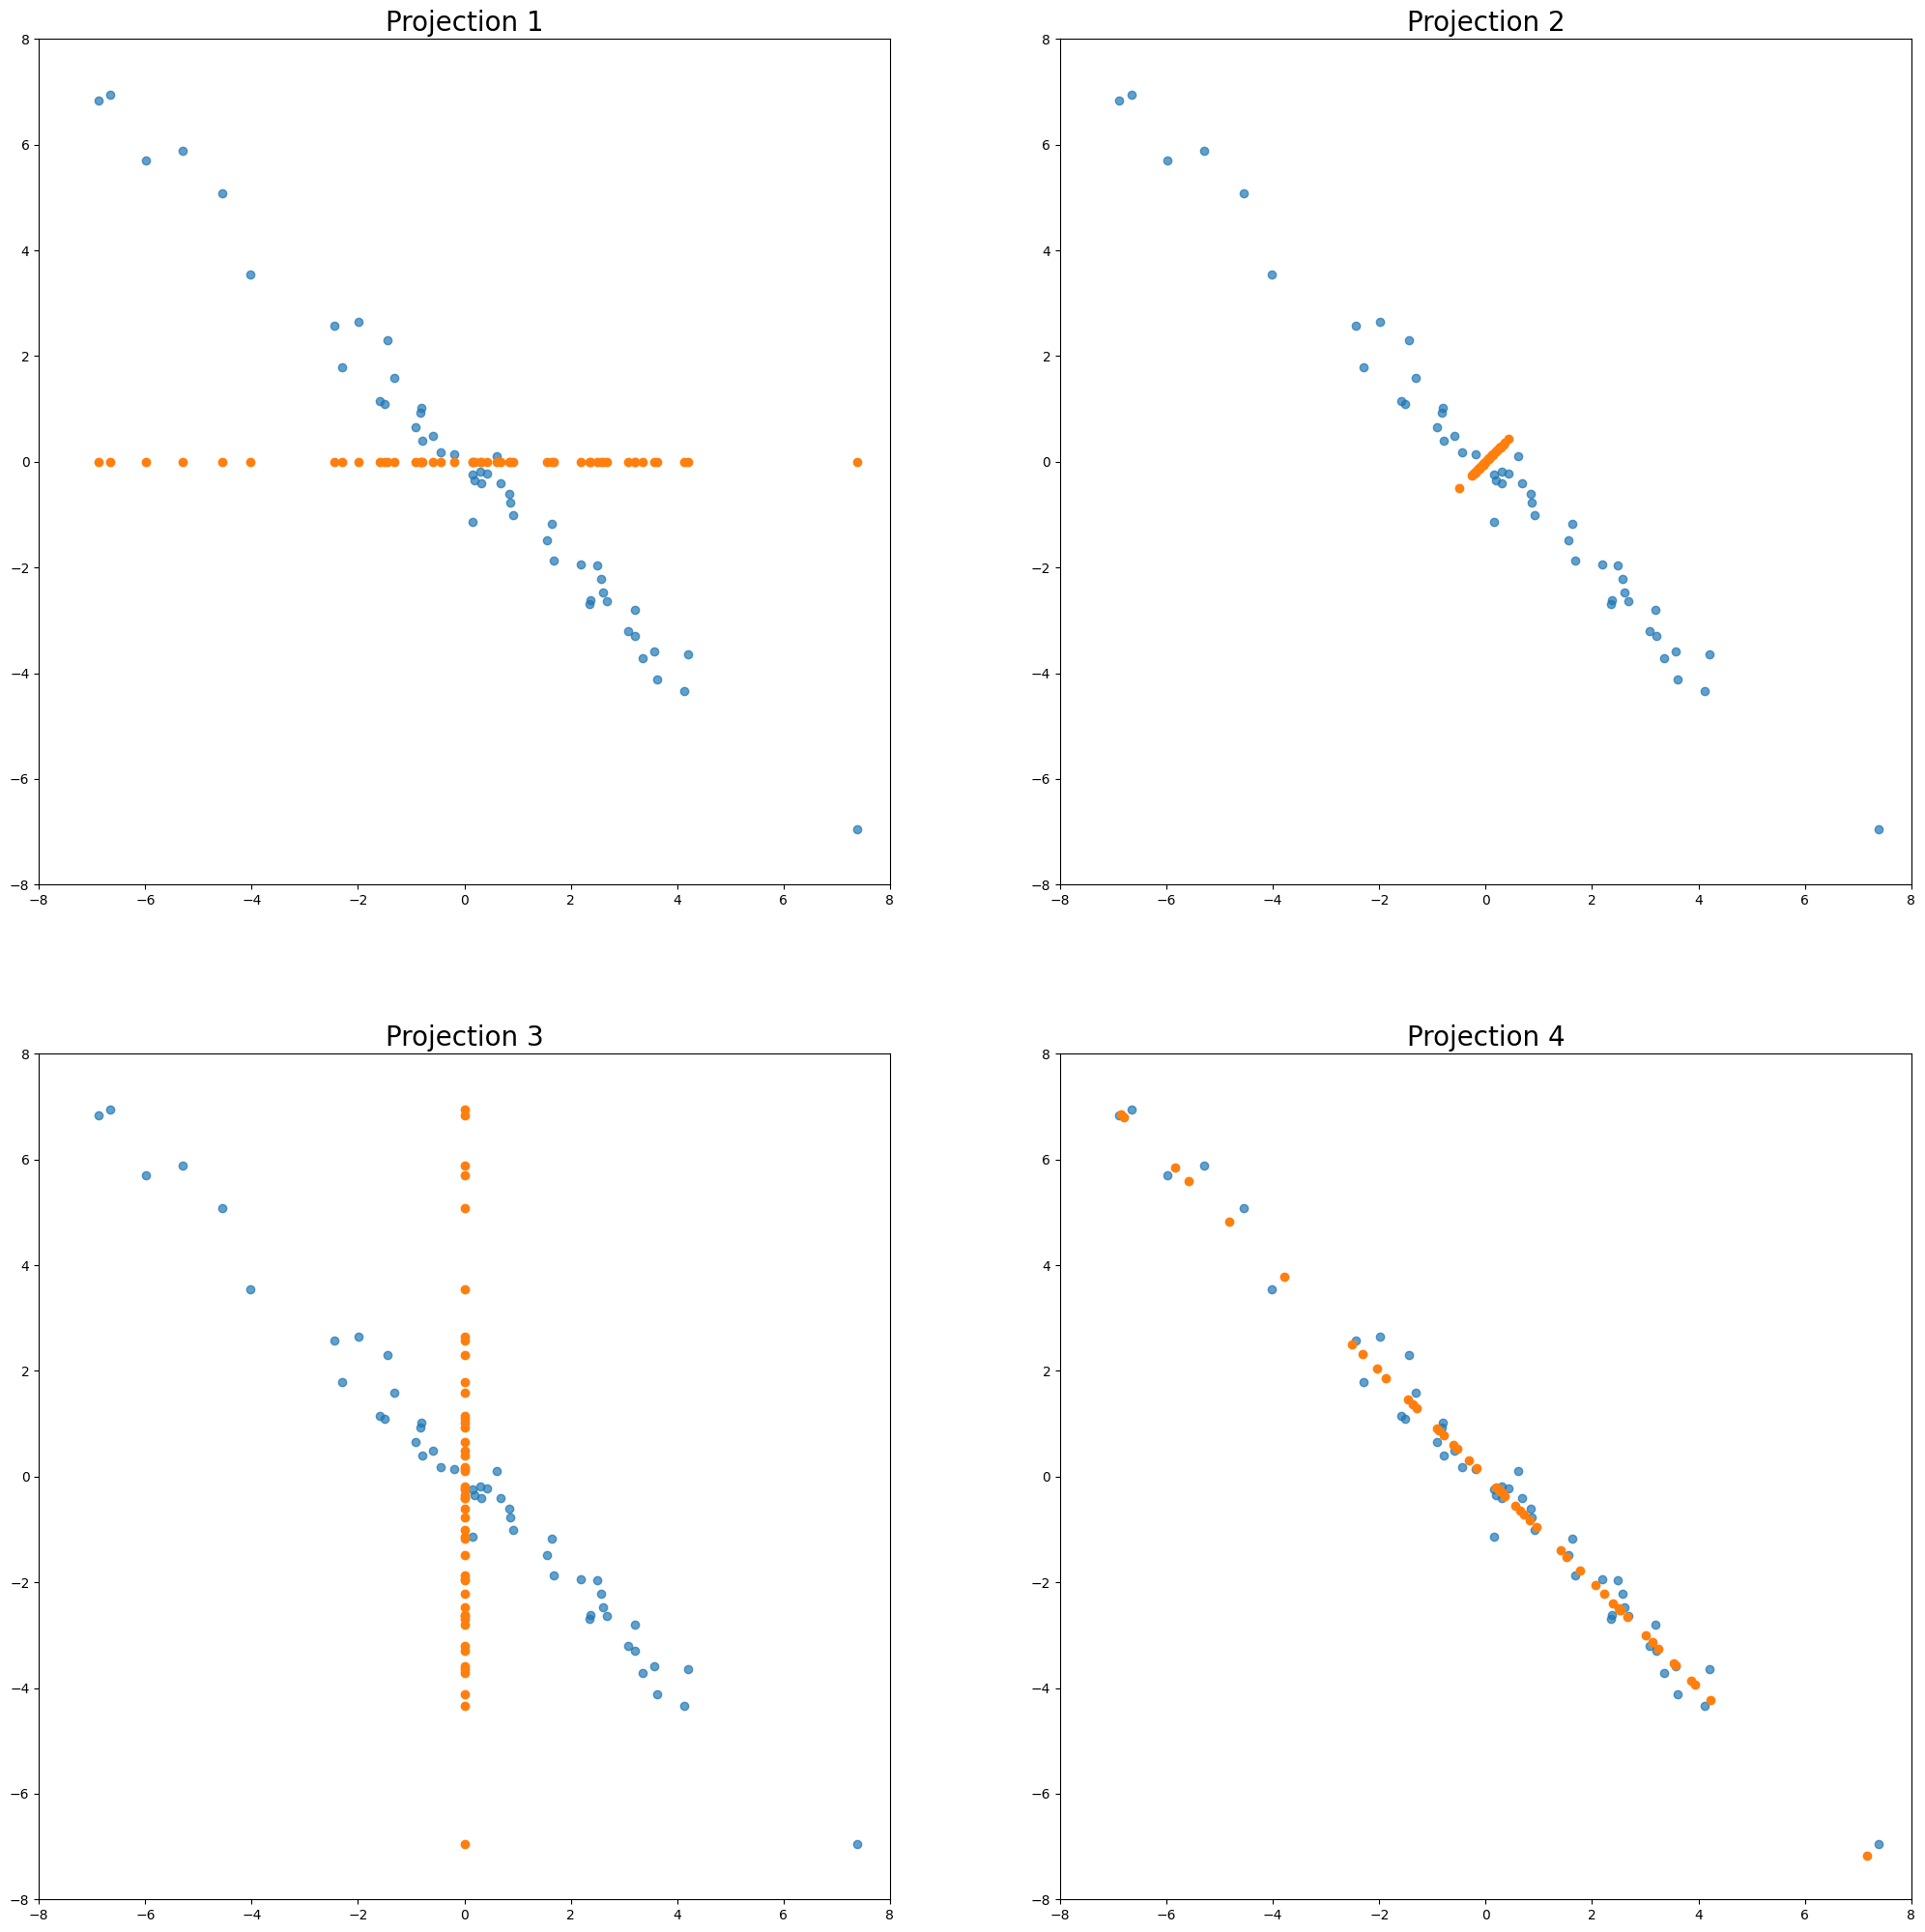

In [1]:
import numpy.random as rand
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

rand.seed(1234)

x1 = 3 * np.outer(rand.normal(0,1,50), np.array([1,-1]))
x2 = rand.multivariate_normal([0,0],np.diag([0.1,0.1]), size = 50)

X = x1 + x2

projection = np.array((1,0)).reshape((2,1))

R = np.matrix([[1/np.sqrt(2), -1/np.sqrt(2)], [1/np.sqrt(2), 1/np.sqrt(2)]])

fig, axs = plt.subplots(2,2, figsize = (25,25))
for i in range(4):
    axs[i//2, i % 2 ].set_xlim([-8,8])
    axs[i//2, i % 2 ].set_ylim([-8,8])
    axs[i//2, i % 2 ].scatter(X[:,0], X[:,1], alpha = 0.7)
    axs[i//2, i % 2 ].title.set_text("Projection %s" % (i+1))
    axs[i//2, i % 2 ].title.set_size(20)
    scores = X @ projection
    Xi = np.outer(scores, projection)
    axs[i//2, i % 2 ].scatter(Xi[:,0],Xi[:,1])
    projection = R @ projection

plt.show()


# Selecting the number of components 

The most common use for PCA is selecting the number of components that you need to keep to train a model. Below is a data set of the SNP500 stocks over the past 5 years. As the market tends to be highly correlated, keeping all of the stocks separate probably isn't going to help a model's performance and is likely to mean models take far longer to train. A better method would be to use PCA to capture most of the variance in just a few components. 

### Question:
Below is a scree plot for the first 10 principle components for the PCA of this data, using it and whatever other analysis you chose decide how variables would you use to fit this data set? Justify your answer. 

In [3]:
import pandas as pd

df = pd.read_csv("all_stocks_5yr.csv")

names = df["Name"].unique()
range(len(df[ df["Name"] == names[0]]["close"]))
l = len(df[ df["Name"] == names[0]]["close"])
data = pd.DataFrame(index = range(l), columns= names)

for name in names: 
    x = df[ df["Name"] == name]["close"]
    if x.isnull().any() or len(x) != l:
        data = data.drop(columns= name)
    else:
        data[name] = np.array(x)

data.head()





,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
1,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
3,14.66,66.7156,78.97,35.27,46.64,34.46,73.56,38.81,46.26,31.16,...,37.80,28.42,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
4,13.99,66.6556,78.84,36.57,46.77,34.70,73.13,38.61,46.54,31.40,...,38.44,28.22,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27



Component 1 
Fraction of total variance explained by this variable: 0.7837053703602576 
 Total fraction of variance explained by the first 1 variable(s): 0.7837053703602576

Component 2 
Fraction of total variance explained by this variable: 0.09162218072840879 
 Total fraction of variance explained by the first 2 variable(s): 0.8753275510886663

Component 3 
Fraction of total variance explained by this variable: 0.05430341223767842 
 Total fraction of variance explained by the first 3 variable(s): 0.9296309633263448

Component 4 
Fraction of total variance explained by this variable: 0.020845338024148966 
 Total fraction of variance explained by the first 4 variable(s): 0.9504763013504938

Component 5 
Fraction of total variance explained by this variable: 0.012893002325176721 
 Total fraction of variance explained by the first 5 variable(s): 0.9633693036756705

Component 6 
Fraction of total variance explained by this variable: 0.008528095295358341 
 Total fraction of variance expla

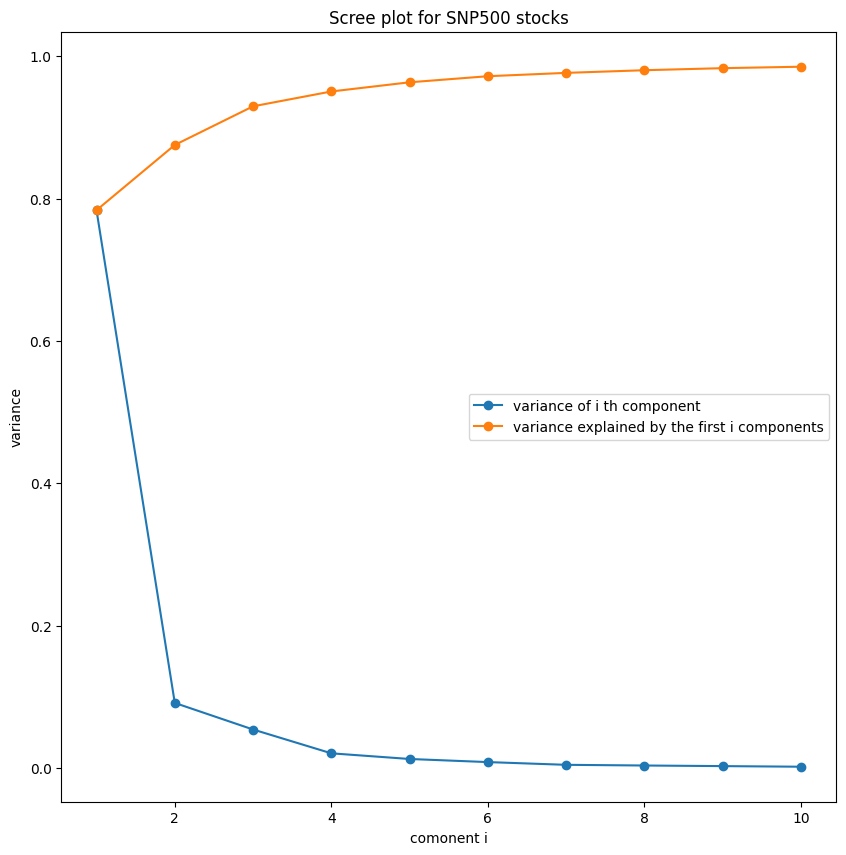

In [5]:
pca = PCA(10).fit(data)
var = pca.explained_variance_ratio_
var_explained = np.zeros(10)
for i in range(10):
    var_explained[i] = sum(var[:i+1])

for i in range(10):
    print("\nComponent", i+1 , "\nFraction of total variance explained by this variable:", var[i],
            "\n Total fraction of variance explained by the first %s variable(s):" % (i +1), var_explained[i] )

plt.figure(figsize = (10,10))
plt.plot(range(1, len(var_explained)+1), var, label = "variance of i th component", marker = "o")
plt.plot(range(1, len(var_explained)+1), var_explained, label = "variance explained by the first i components", marker = "o")
plt.xlabel("comonent i")
plt.ylabel("variance")
plt.title("Scree plot for SNP500 stocks")
plt.legend()
plt.show()


    

# Pre-processing the data 

Let's consider which stocks contribute most to the principle axis. If we use the raw data (as we fitted above) we find that the stocks that have a high average price are those that are found to be the most variable. However this isn't very useful information for us -- we're generally more interested in how much stocks vary in comparison to their current value. A large variance due to a large initial value isn't informative about the change in the percentage price. To help with a more interpretable selection of components we can pre-process the data so all stocks appear to have a mean value of 0 and a variance of one, below is a piece of code that pre-processes data in the way described.

### Question
Look at the scree plot below. Is it safe to assume that you should use the same number of components to fit this PCA model as before? 


Component 1 
Fraction of total variance explained by this variable: 0.7837053703602576 
 Total fraction of variance explained by the first 1 variable(s): 0.7837053703602576

Component 2 
Fraction of total variance explained by this variable: 0.09162218072840879 
 Total fraction of variance explained by the first 2 variable(s): 0.8753275510886663

Component 3 
Fraction of total variance explained by this variable: 0.05430341223767842 
 Total fraction of variance explained by the first 3 variable(s): 0.9296309633263448

Component 4 
Fraction of total variance explained by this variable: 0.020845338024148966 
 Total fraction of variance explained by the first 4 variable(s): 0.9504763013504938

Component 5 
Fraction of total variance explained by this variable: 0.012893002325176721 
 Total fraction of variance explained by the first 5 variable(s): 0.9633693036756705

Component 6 
Fraction of total variance explained by this variable: 0.008528095295358341 
 Total fraction of variance expla

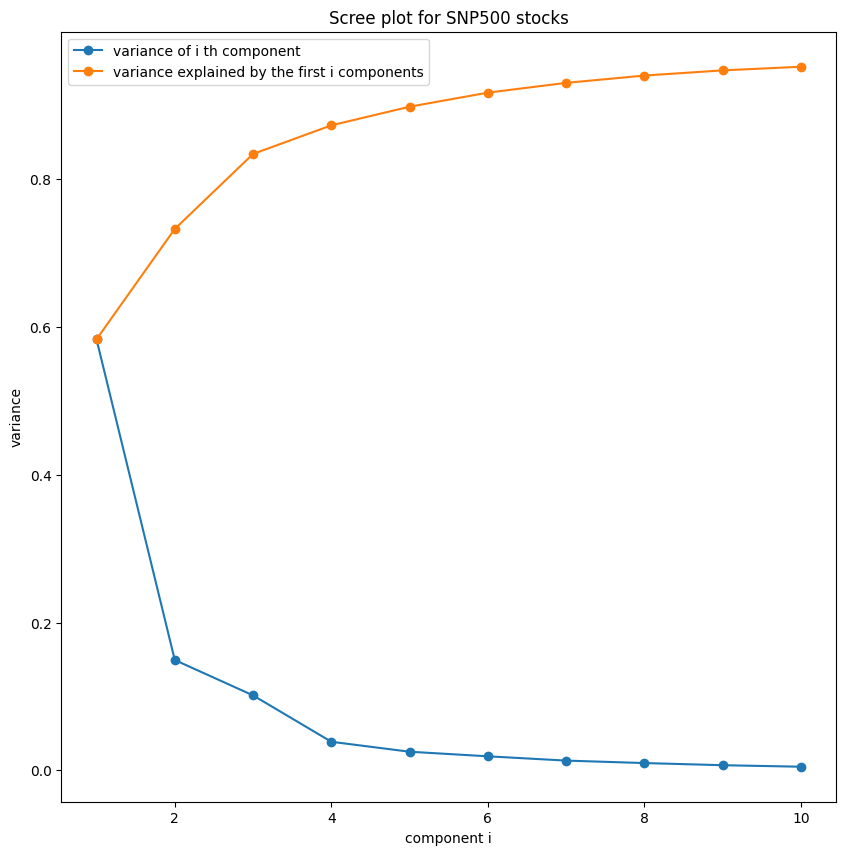

In [7]:
# First we pre-process the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data)


data_scaled = scaler.transform(data)


# then we perform the same tests as before
pca_scaled = PCA(10).fit(data_scaled)
var_scaled = pca_scaled.explained_variance_ratio_
var_scaled_explained = np.zeros(10)
for i in range(10):
    var_scaled_explained[i] = sum(var_scaled[:i+1])

for i in range(10):
    print("\nComponent", i+1 , "\nFraction of total variance explained by this variable:", var[i],
            "\n Total fraction of variance explained by the first %s variable(s):" % (i +1), var_explained[i] )

plt.figure(figsize = (10,10))
plt.plot(range(1, len(var_explained)+1), var_scaled, label = "variance of i th component", marker = "o")
plt.plot(range(1, len(var_explained)+1), var_scaled_explained, label = "variance explained by the first i components", marker = "o")
plt.xlabel("component i")
plt.ylabel("variance")
plt.title("Scree plot for SNP500 stocks")
plt.legend()
plt.show()

# Differences between PCA on pre-processed and raw data

Pre-processing the data means that you will find different principle components for the data. This is illustrated in the code below in two ways: 
    1) We look at which stocks 5 stocks make the largest contribution to the principle component. These are not the same -- the PCA model has found different sources for the variance. 
    2) We look at a plot of the scores along the first two principle components. While these look similar, note that the scale of the two is completely different and that various features have been enhanced or compressed in the pre-processed data 

# Question 
Imagine you are an investor who's strategy is to invest in the SNP500 according to the ratio that those stocks appear in the first principle component of this historic data. However, you decide that it is too risky to select stocks in this way as the variance of the profits/losses will be high. In order to counter this you decide to split your capital in two and invest half using the strategy described above and half using a the same strategy but for the second principle component - which is uncorrelated with the first and has a lower variance. When applying this strategy is it better to use the raw data or the pre-processed data to find the principle components. 

Largest 5 contributors to the principle componet of unpreprocessed data: Index(['PCLN', 'AMZN', 'GOOGL', 'MTD', 'EQIX'], dtype='object')
Largest 5 contributors to the principle componet of preprocessed data: Index(['CTAS', 'BDX', 'AVGO', 'LMT', 'NOC'], dtype='object')


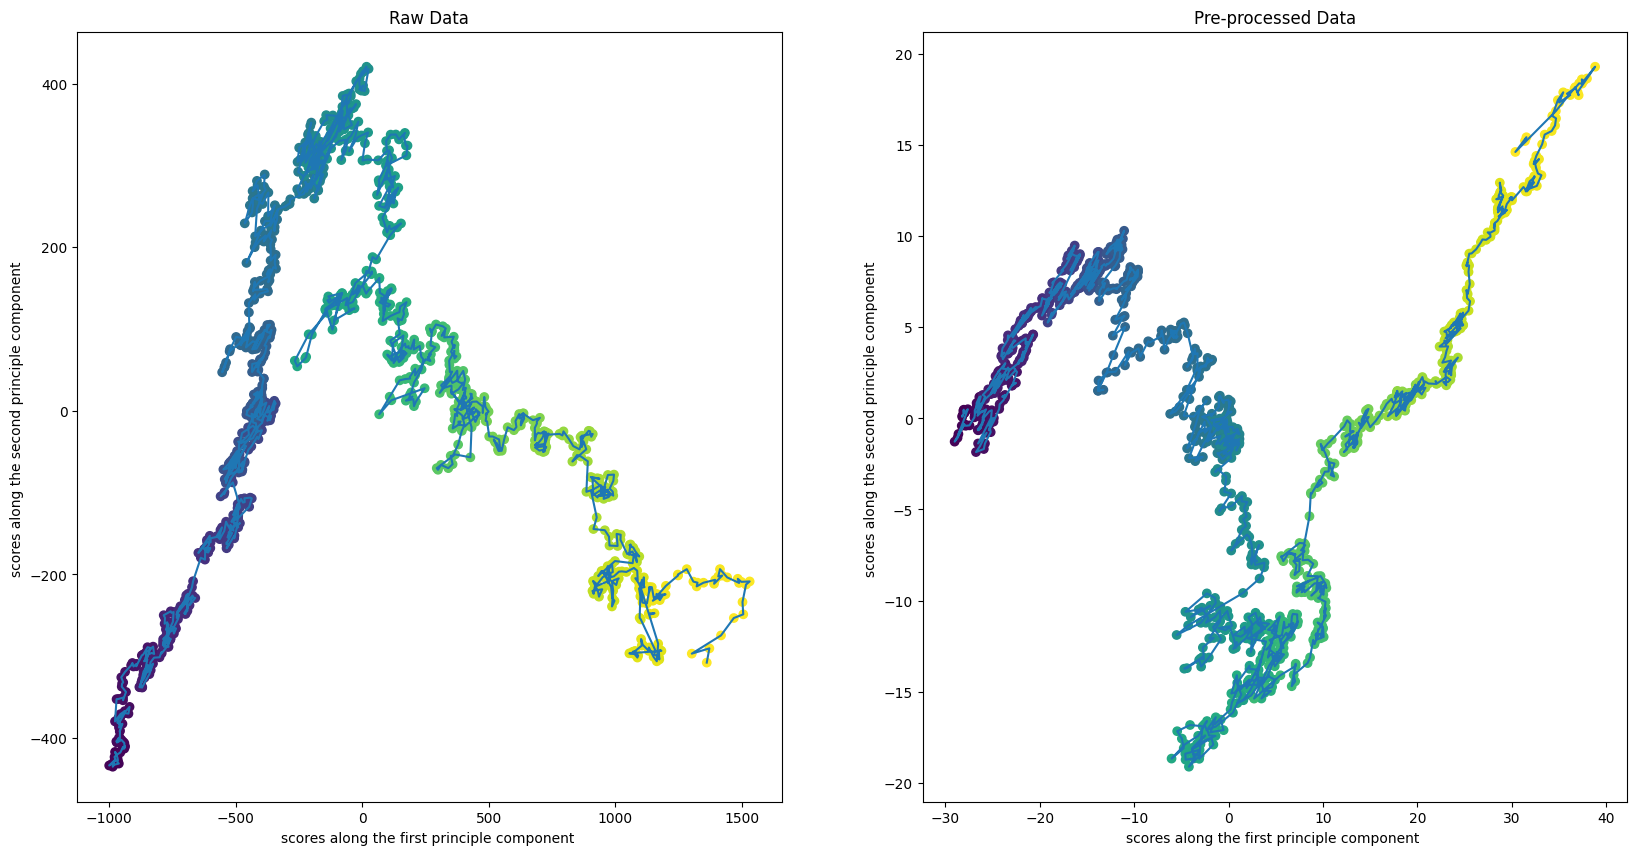

83.69295150457137


In [9]:
stocks = data.columns[np.argsort(pca.components_[0])[-1:-6:-1]]

print("Largest 5 contributors to the principle componet of unpreprocessed data:", stocks)

stocks_scaled = data.columns[np.argsort(pca_scaled.components_[0])[-1:-6:-1]]

print("Largest 5 contributors to the principle componet of preprocessed data:", stocks_scaled)

fig, axs = plt.subplots(1,2, figsize = (20,10))
axs[0].plot(pca.transform(data)[:,0],pca.transform(data)[:,1])
axs[0].scatter(pca.transform(data)[:,0],pca.transform(data)[:,1], c = np.arange(l)/l)
axs[1].plot(pca_scaled.transform(data_scaled)[:,0],pca_scaled.transform(data_scaled)[:,1])
axs[1].scatter(pca_scaled.transform(data_scaled)[:,0],pca_scaled.transform(data_scaled)[:,1], c = np.arange(l)/l)
axs[0].set_title("Raw Data")
axs[1].set_title("Pre-processed Data")
axs[0].set_xlabel("scores along the first principle component ")
axs[0].set_ylabel("scores along the second principle component ")
axs[1].set_xlabel("scores along the first principle component ")
axs[1].set_ylabel("scores along the second principle component ")
plt.show()
print(np.mean(data))



# Kernel PCA

Kernel PCA is a non-linear extension to PCA. This allows PCA to be used in situations where the simple linear PCA is unable to find a useful method for dimensionality reduction. However, when using kernel PCA there is an additional decision that the practitioner needs to make: which kernel to use. 

Below the same data set on stocks over 5 years is plotted using the linear kernel, along with 3 new non-linear kernels that are built into scikit learn. Note the significant differences in the first two components of the PCA projections that are now calculated. 

With this type of analysis it may not always be clear which kernel to use - usually evaluating the performance on the method that you attempt is the most important consideration. Knowing about the different possible kernels for PCA is an important additional tool that can be leveraged to solve problems that cannot be tackled otherwise. 


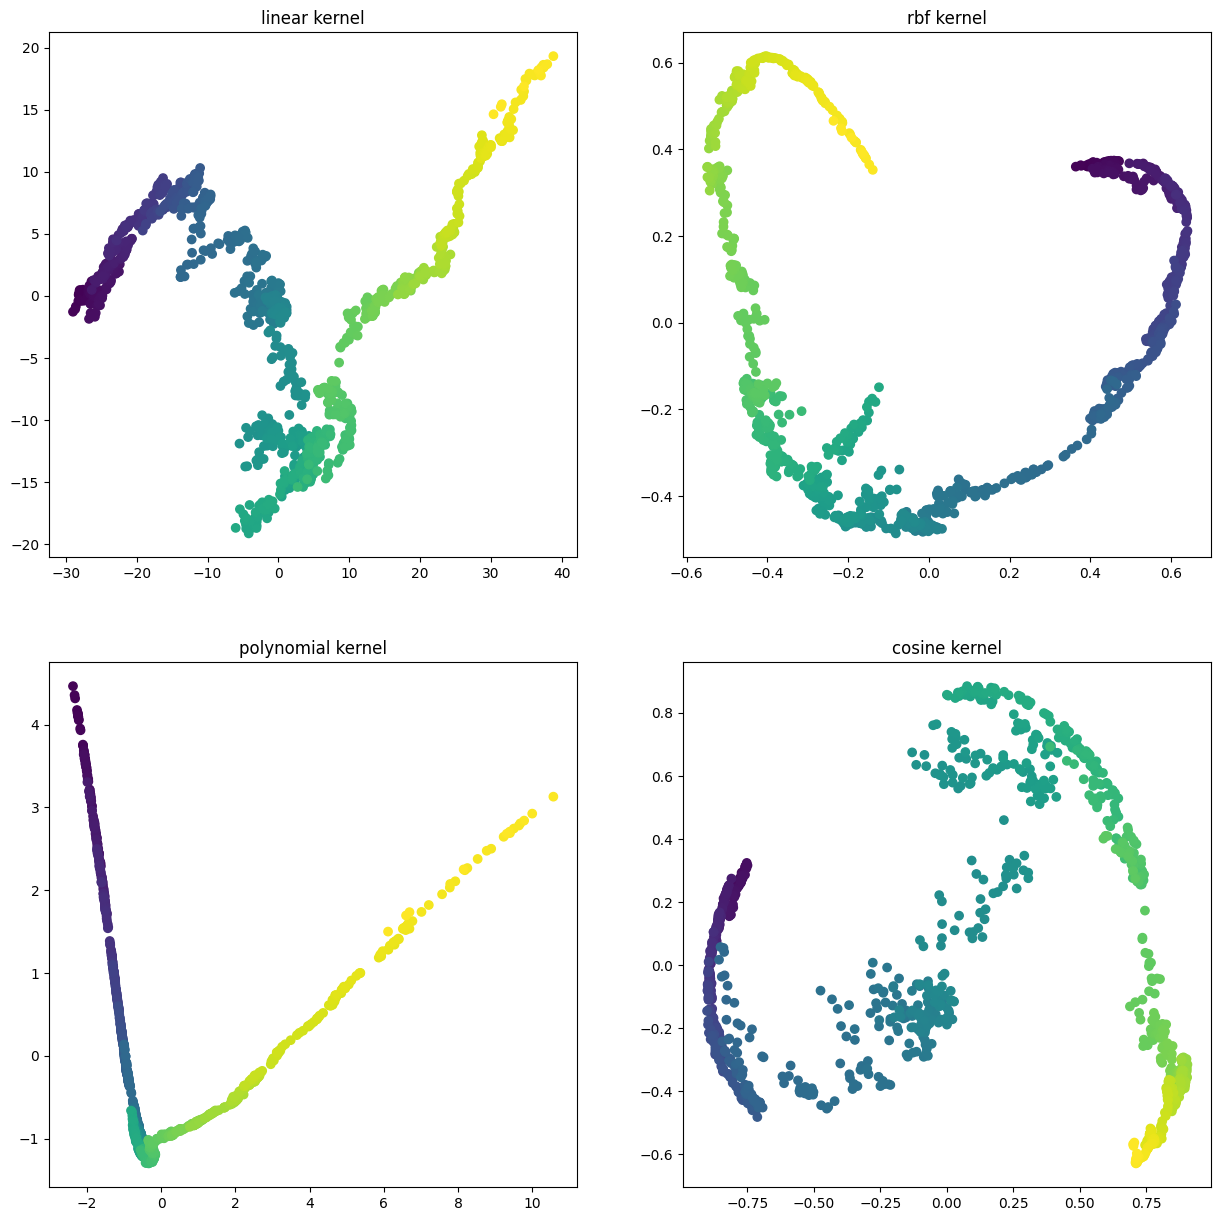

In [11]:
from sklearn.decomposition import KernelPCA

kpca_linear = KernelPCA(n_components = 10, kernel = "linear")
kpca_rbf = KernelPCA(n_components = 10, kernel = "rbf")
kpca_poly = KernelPCA(n_components= 10, kernel= "poly")
kpca_cos = KernelPCA(n_components= 10, kernel= "cosine")

X_linear = kpca_linear.fit_transform(data_scaled)
X_rbf = kpca_rbf.fit_transform(data_scaled)
X_poly = kpca_poly.fit_transform(data_scaled)
X_cos = kpca_cos.fit_transform(data_scaled)


fig, axs = plt.subplots(2,2, figsize = (15, 15))
axs[0, 0].scatter(X_linear[:,0],X_linear[:, 1], c = np.arange(l)/l)
axs[0, 0].set_title("linear kernel")
axs[0, 1].scatter(X_rbf[:, 0], X_rbf[:, 1], c = np.arange(l)/l)
axs[0, 1].set_title("rbf kernel")
axs[1, 0].scatter(X_poly[:,0],X_poly[:, 1], c = np.arange(l)/l)
axs[1, 0].set_title("polynomial kernel")
axs[1, 1].scatter(X_cos[:,0],X_cos[:, 1], c = np.arange(l)/l)
axs[1, 1].set_title("cosine kernel")
plt.show()

# Exercise 

Below is a famous dataset for machine learning on various biological properties of different species of irises. Using the techniques you've learned here investigate which PCA/K-PCA method does the best job at separating the different irises into their different species based onl on the measurements of their sepals and petals. 

In [74]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


# Solution

- The unscaled versions of PCA/KPCA perform far better - in this case scaling throws out useful data for the model
- If you are limited to a single component then the cosine kernel clearly does the best job at separating along the first component 
- If you go to two components then the unscaled polynomial kernel performs best, although any of the unscaled kernels would be a fine solution

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


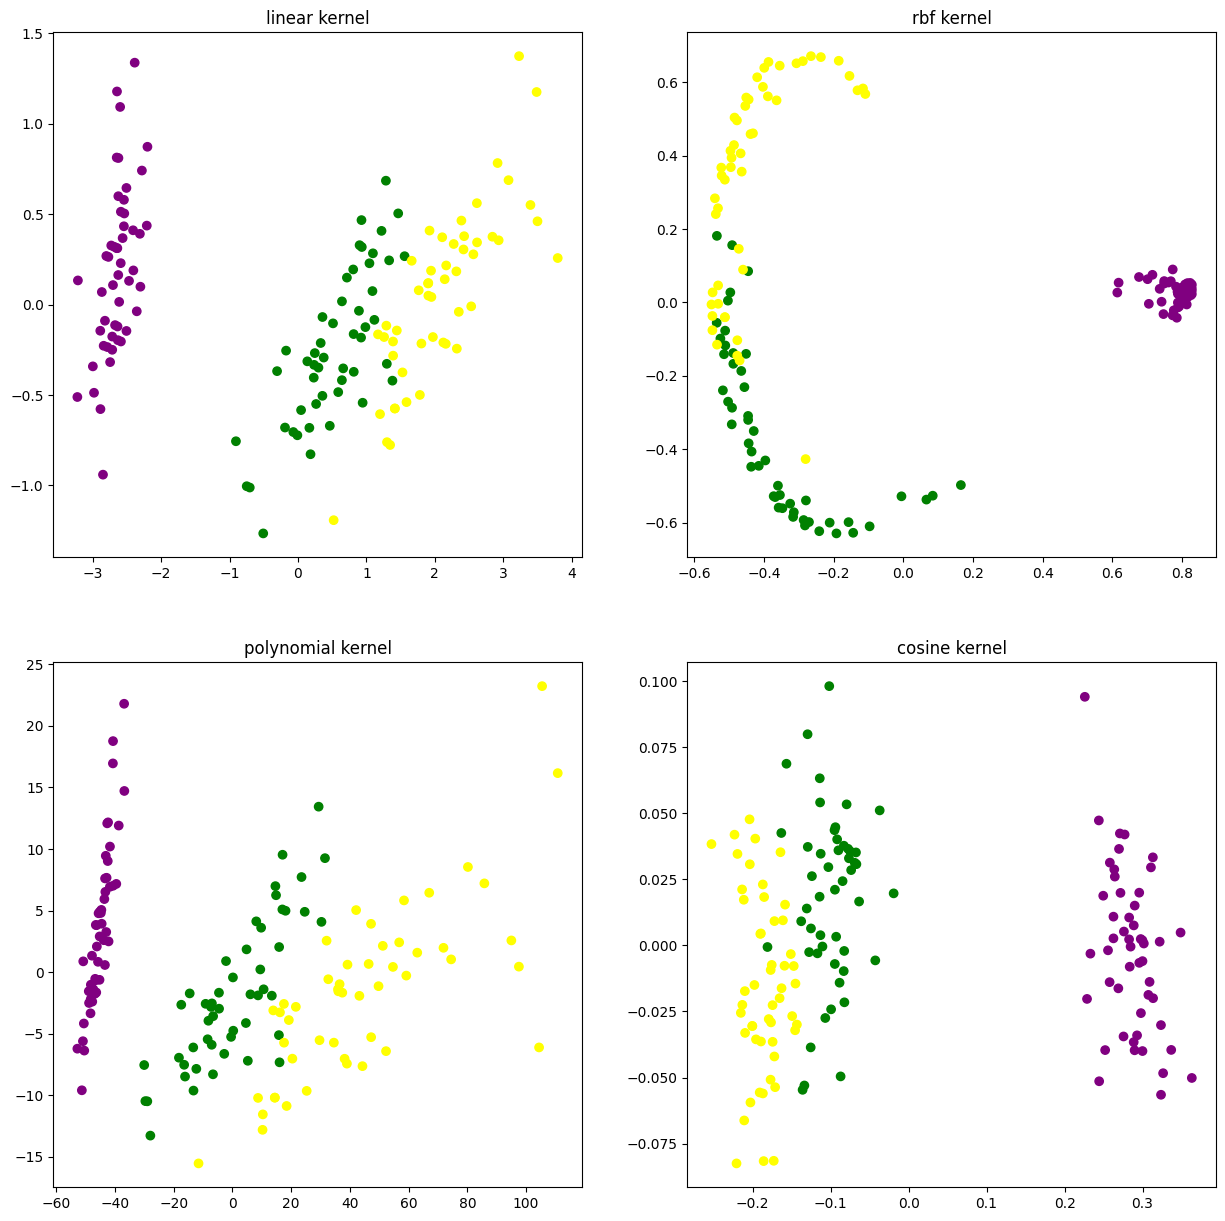

In [48]:

iris_df = pd.DataFrame(data= iris['data'],
                     columns= iris['feature_names'])

print(iris_df.head())

X_linear = kpca_linear.fit_transform(iris_df)
X_rbf = kpca_rbf.fit_transform(iris_df)
X_poly = kpca_poly.fit_transform(iris_df)
X_cos = kpca_cos.fit_transform(iris_df)

# Define custom colors for each class
colors = {0: 'purple', 1: 'green', 2: 'yellow'}  # Setosa = purple, Versicolor = green, Virginica = yellow

# Map the target values to colors
color_map = [colors[label] for label in iris.target]

fig, axs = plt.subplots(2,2, figsize = (15, 15))
axs[0, 0].scatter(X_linear[:,0],X_linear[:, 1], c = color_map)
axs[0, 0].set_title("linear kernel")
axs[0, 1].scatter(X_rbf[:, 0], X_rbf[:, 1], c = color_map)
axs[0, 1].set_title("rbf kernel")
axs[1, 0].scatter(X_poly[:,0],X_poly[:,1], c = color_map)
axs[1, 0].set_title("polynomial kernel")
axs[1, 1].scatter(X_cos[:,0],X_cos[:,1], c = color_map)
axs[1, 1].set_title("cosine kernel")
plt.show()

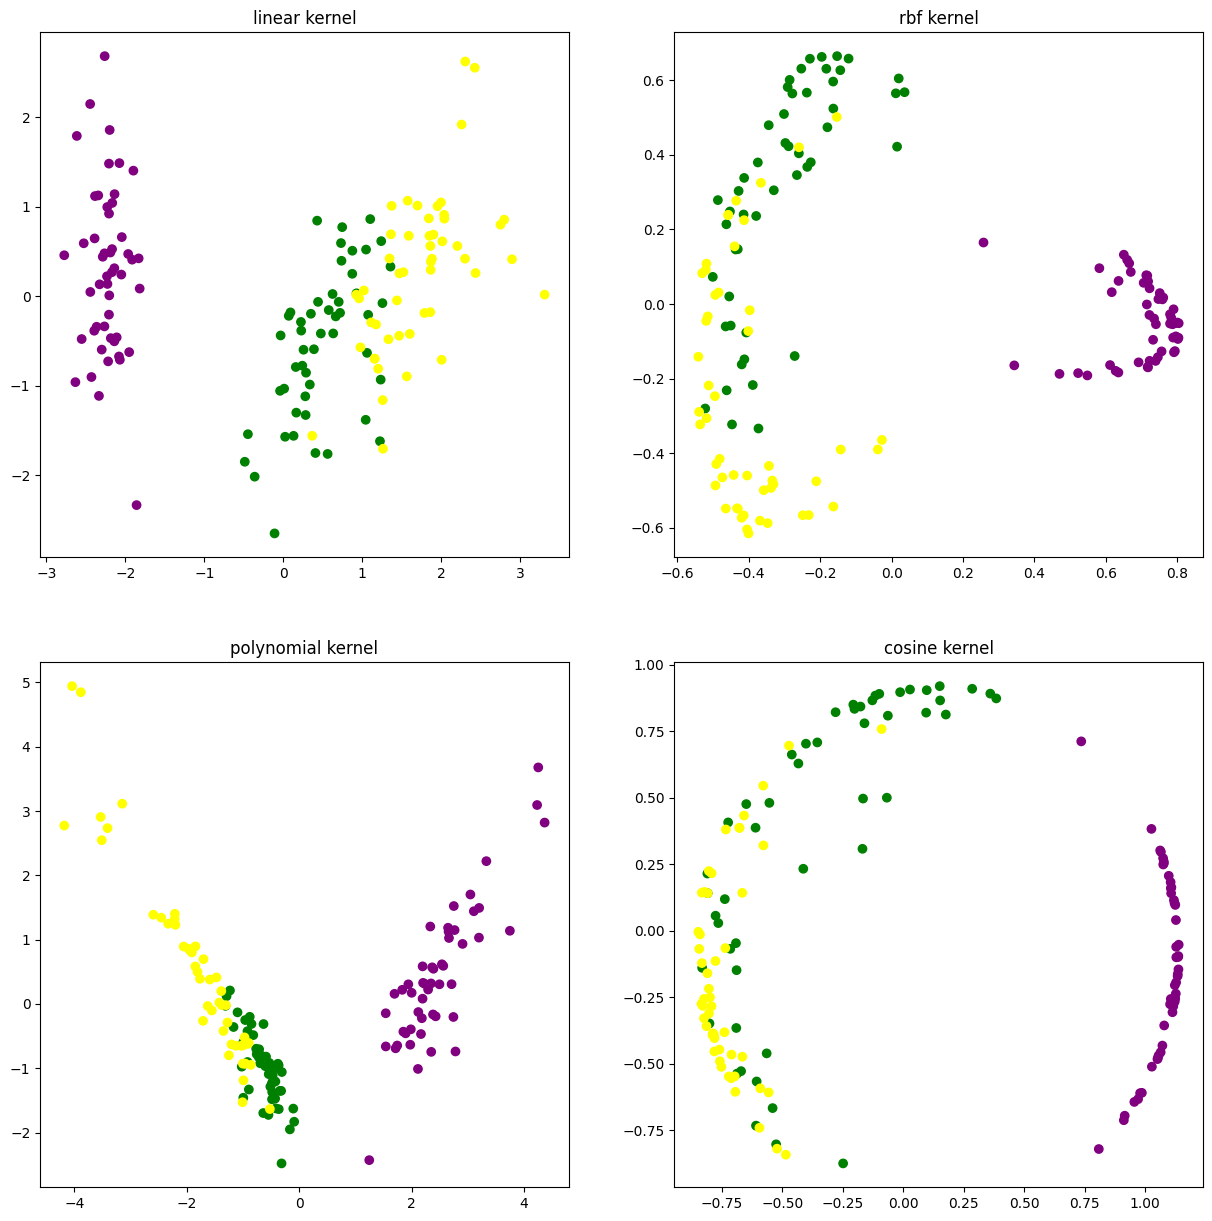

In [54]:
scaler = StandardScaler().fit(iris_df)

iris_scaled = scaler.transform(iris_df)

X_linear = kpca_linear.fit_transform(iris_scaled)
X_rbf = kpca_rbf.fit_transform(iris_scaled)
X_poly = kpca_poly.fit_transform(iris_scaled)
X_cos = kpca_cos.fit_transform(iris_scaled)

# Define custom colors for each class
colors = {0: 'purple', 1: 'green', 2: 'yellow'}  # Setosa = purple, Versicolor = green, Virginica = yellow

# Map the target values to colors
color_map = [colors[label] for label in iris.target]

fig, axs = plt.subplots(2,2, figsize = (15, 15))
axs[0, 0].scatter(X_linear[:,0],X_linear[:, 1], c = color_map)
axs[0, 0].set_title("linear kernel")
axs[0, 1].scatter(X_rbf[:, 0], X_rbf[:, 1], c = color_map)
axs[0, 1].set_title("rbf kernel")
axs[1, 0].scatter(X_poly[:,0],X_poly[:,1], c = color_map)
axs[1, 0].set_title("polynomial kernel")
axs[1, 1].scatter(X_cos[:,0],X_cos[:,1], c = color_map)
axs[1, 1].set_title("cosine kernel")
plt.show()

